In [1]:
%matplotlib notebook

from sdss import SDSS
import mikkel_tools.utility as mt_util
import plot as sds_plt

import numpy as np
#import cupy as cp
import scipy as sp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pyshtools
import pickle

comment = "Attempt at separation"
nb_name = "nb_sh_separation_init"

# Core

In [2]:
core = SDSS(comment, N_SH = 60, sim_type = "core", sat_height = 350)

core.grid_glq(nmax = 40, r_at = core.r_cmb)

grid_in = np.array([core.grid_glq_phi, 90-core.grid_glq_theta]).T
core.make_grid(core.r_cmb, grid_in, calc_sph_d = True)


<IPython.core.display.Javascript object>


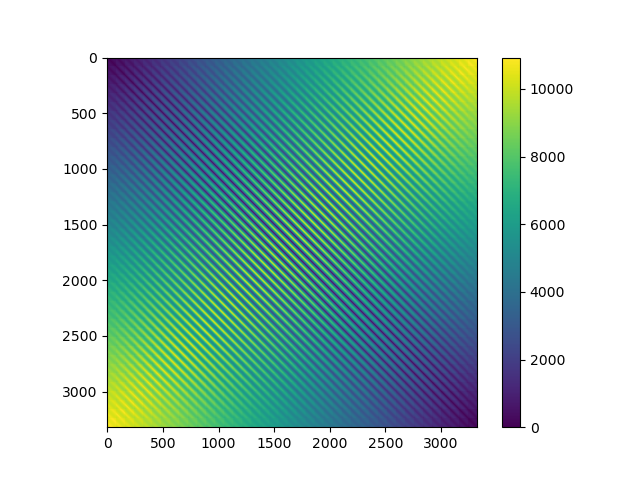

In [3]:
plt.figure()
plt.imshow(core.sph_d)
plt.colorbar()

In [22]:
core.generate_map()

<IPython.core.display.Javascript object>


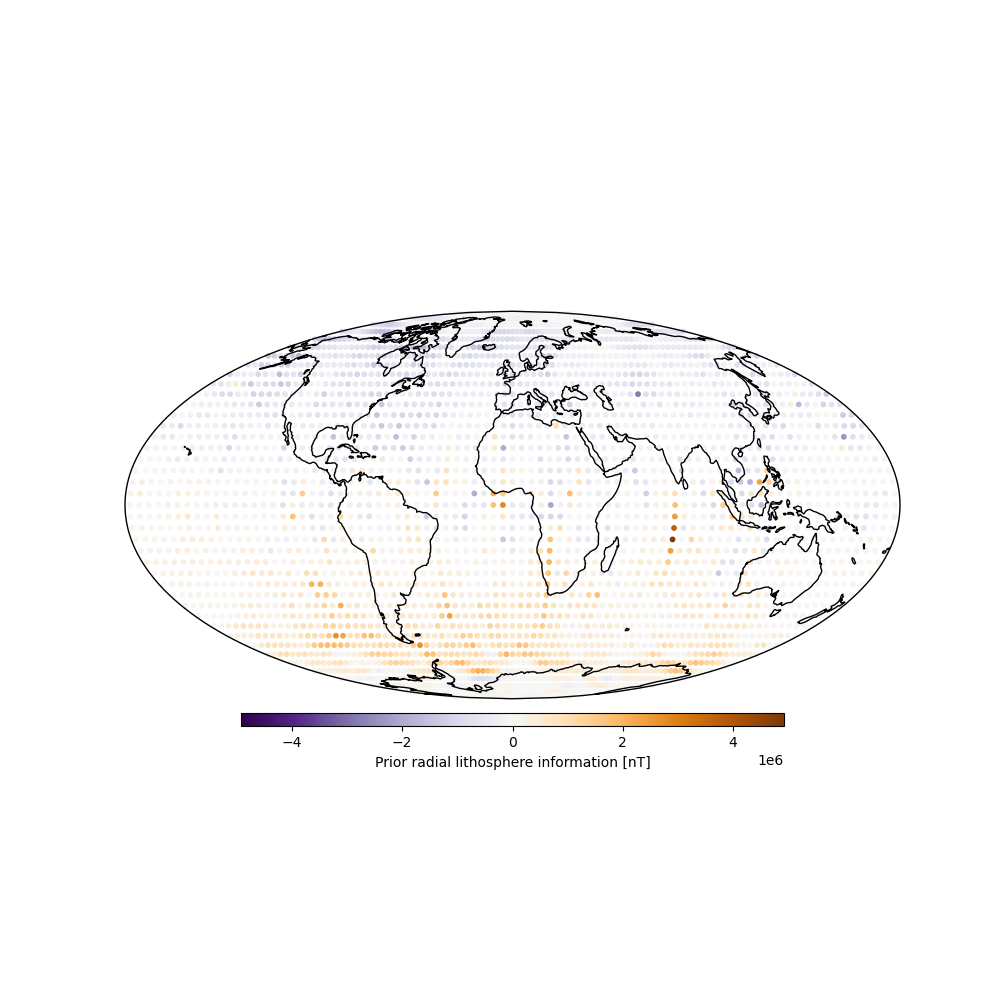

In [23]:
mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=core.data, point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="Prior radial lithosphere information")

In [24]:
core.condtab(normsize=10000)

In [25]:
core.semivar(model_lags = 24, model = "exponential", max_dist = 7000, lag_length = 50, zero_nugget = True)

____semi-variogram setup___

Number of data used: 7656525
Max data distance: 6999.763 km
Lag length chosen: 50.0 km
Number of lags: 139
Number of modelling lags: 24

Semi-variogram model determined, starting LUT computation



<IPython.core.display.Javascript object>


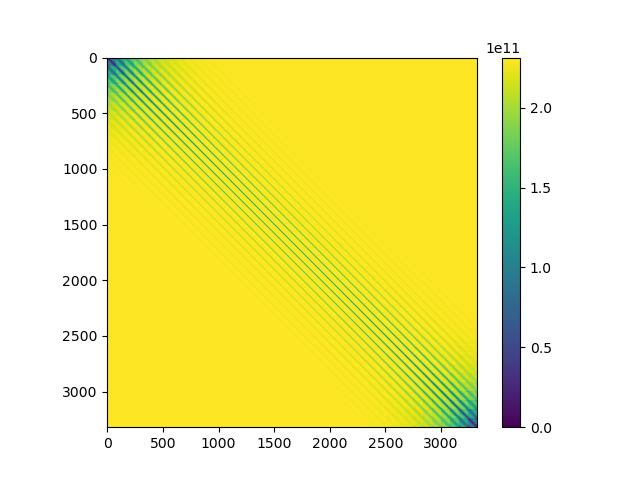

In [26]:
plt.figure()
plt.imshow(core.sv_lut)
plt.colorbar()

<IPython.core.display.Javascript object>


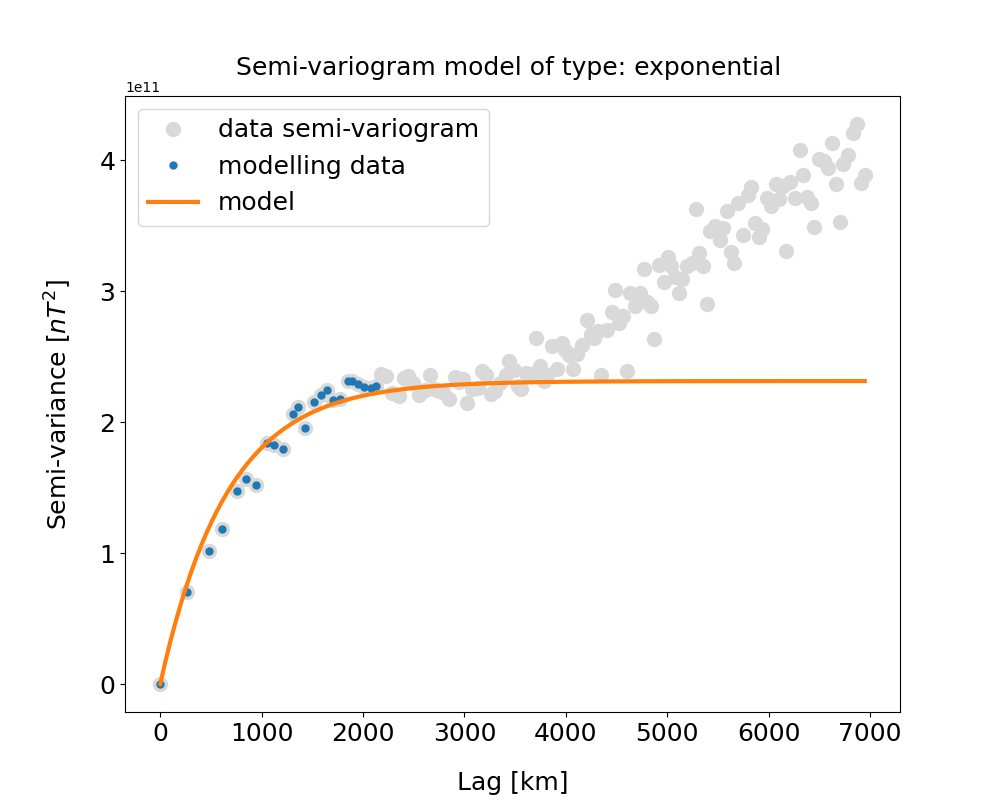

In [27]:
#%% PLOT SEMI-VARIOGRAM
plt.figure(figsize=(10,8)) 
plt.plot(core.lags,core.pics,'o', markersize=10,color = '0.85',label='data semi-variogram')
plt.plot(core.lags_model,core.pics_model,'.',markersize=10,label='modelling data')
plt.plot(core.lags_sv_curve,core.sv_curve,color='C1',linewidth = 3,label='model')
plt.ylabel('Semi-variance $[%s^2]$' % "nT",fontsize=18,labelpad=18)
plt.xlabel('Lag [km]',fontsize=18,labelpad=18)
plt.title("Semi-variogram model of type: %s " % core.model_names[core.model],fontsize=18,y=1.02)
plt.legend(loc='best',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

In [28]:
print(core)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               Attempt at separation
class_abs_path:        /home/mikotz/spherical_direct_sequential_simulation
N_SH:                  60
sim_type:              core
grid_glq_zero:         (41,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools:    (41,), Max/Min: 0.08 / 0.00
grid_glq_shape:        (2,), Max/Min: 81.00 / 41.00
grid_glq_w:            (3321,), Max/Min: 0.08 / 0.00
grid_glq_radial:       (3321,), Max/Min: 3480.00 / 3480.00
grid_glq_theta:        (3321,), Max/Min: 176.68 / 3.32
grid_glq_phi:          (3321,), Max/Min: 355.56 / 0.00
grid_glq_N:            3321
grid_glq_nmax:         40
r_grid:                3480.0
grid:                  (3321, 2)
sph_d:                 (3321, 3321)
lon:                   (3321,), Max/Min: 355.56 / 0.00
lat:                   (3321

# Lithosphere

In [29]:
lithos = SDSS(comment, N_SH = 60, sim_type = "surface", sat_height = 350)

lithos.grid_glq(nmax = 60, r_at = core.a)

grid_in = np.array([lithos.grid_glq_phi, 90-lithos.grid_glq_theta]).T
lithos.make_grid(lithos.a, grid_in, calc_sph_d = True)


<IPython.core.display.Javascript object>


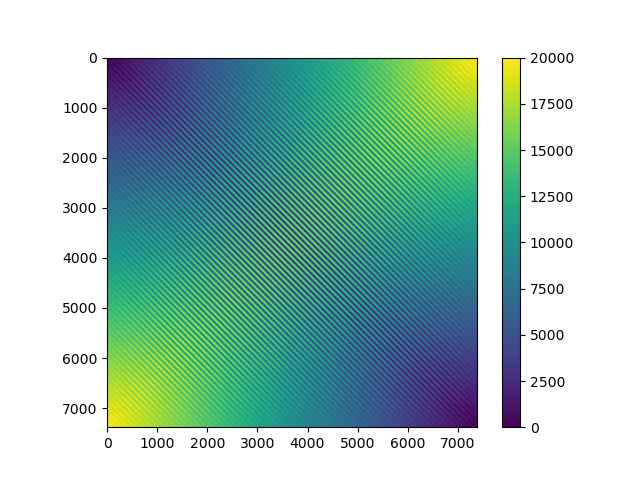

In [30]:
plt.figure()
plt.imshow(lithos.sph_d)
plt.colorbar()

In [31]:
lithos.generate_map()

<IPython.core.display.Javascript object>


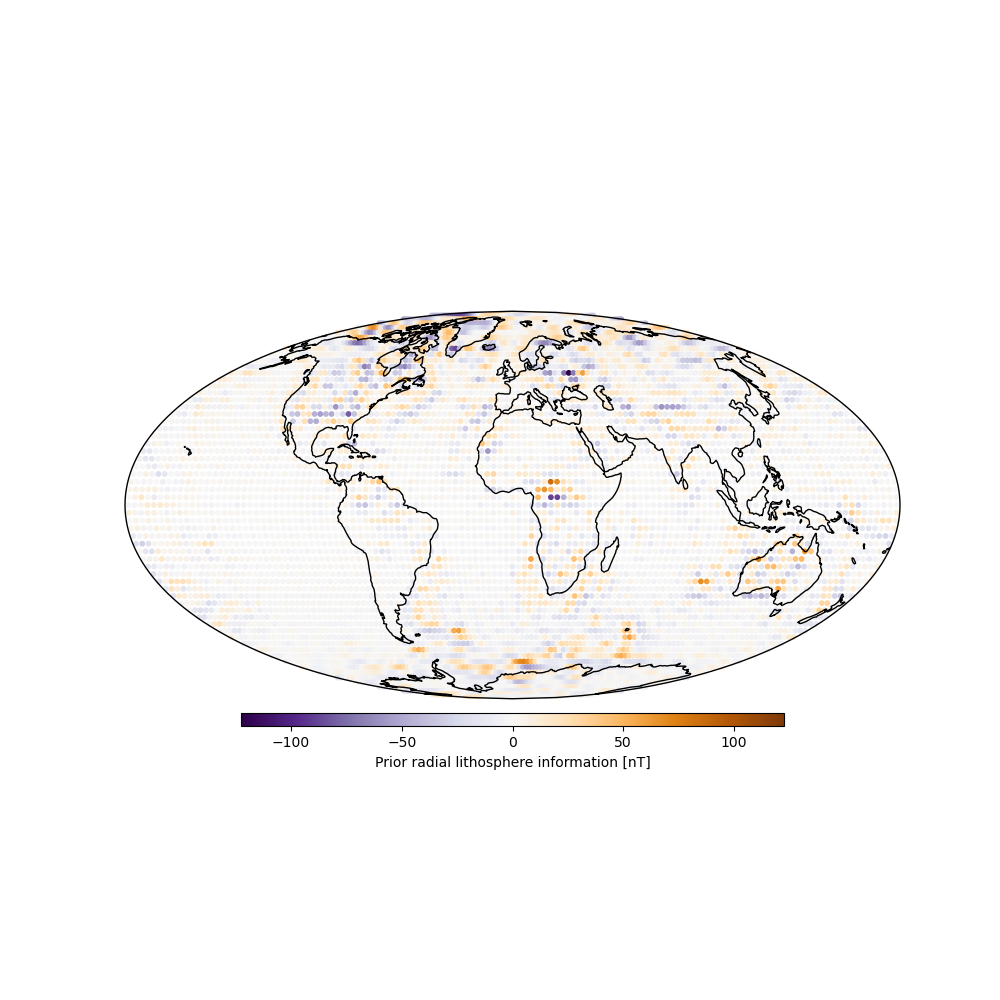

In [32]:
mt_util.plot_cartopy_global(lat = lithos.lat, lon = lithos.lon, plot_quality = "high", 
                            data=lithos.data, point_size=10, shift_grid = True, 
                            transpose_grid = True, shape = (121,61), cmap = 'PuOr_r', 
                            title="Prior radial lithosphere information")

In [33]:
lithos.condtab(normsize=10000)

In [99]:
#lithos.semivar(model_lags = 20, model = "spherical", max_dist = 7000, lag_length = 20, zero_nugget = True)
lithos.semivar(model_lags = "all", model = "exponential", max_dist = 20000, lag_length = 20, zero_nugget = True)

____semi-variogram setup___

Number of data used: 54478193
Max data distance: 19996.320 km
Lag length chosen: 20.0 km
Number of lags: 999
Number of modelling lags: all

Semi-variogram model determined, starting LUT computation



<IPython.core.display.Javascript object>


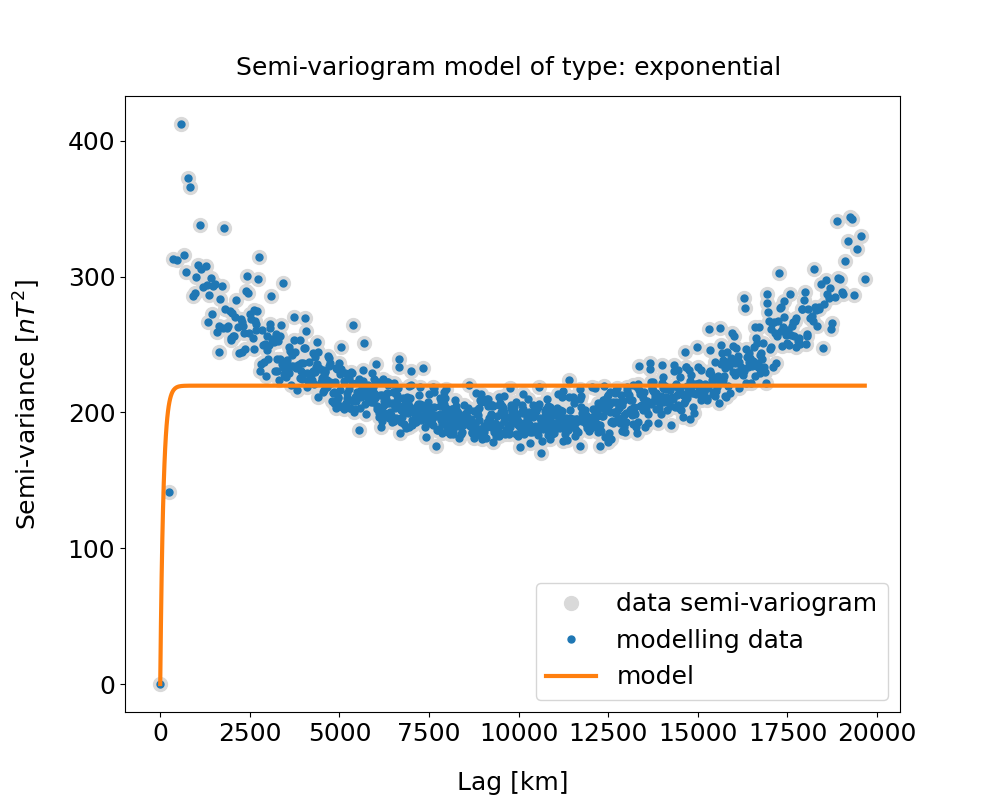

In [100]:
#%% PLOT SEMI-VARIOGRAM
plt.figure(figsize=(10,8)) 
plt.plot(lithos.lags,lithos.pics,'o', markersize=10,color = '0.85',label='data semi-variogram')
plt.plot(lithos.lags_model,lithos.pics_model,'.',markersize=10,label='modelling data')
plt.plot(lithos.lags_sv_curve,lithos.sv_curve,color='C1',linewidth = 3,label='model')
plt.ylabel('Semi-variance $[%s^2]$' % "nT",fontsize=18,labelpad=18)
plt.xlabel('Lag [km]',fontsize=18,labelpad=18)
plt.title("Semi-variogram model of type: %s " % lithos.model_names[lithos.model],fontsize=18,y=1.02)
plt.legend(loc='best',fontsize=18)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.show()

In [101]:
print(lithos)


______current attributes______

a:                     6371.2
r_sat:                 6721.2
r_cmb:                 3480.0
rad:                   0.017453292519943295
mu0:                   1.2566370614359173e-06
comment:               Attempt at separation
class_abs_path:        /home/mikotz/spherical_direct_sequential_simulation
N_SH:                  60
sim_type:              surface
grid_glq_zero:         (61,), Max/Min: 1.00 / -1.00
grid_glq_w_shtools:    (61,), Max/Min: 0.05 / 0.00
grid_glq_shape:        (2,), Max/Min: 121.00 / 61.00
grid_glq_w:            (7381,), Max/Min: 0.05 / 0.00
grid_glq_radial:       (7381,), Max/Min: 6371.20 / 6371.20
grid_glq_theta:        (7381,), Max/Min: 177.76 / 2.24
grid_glq_phi:          (7381,), Max/Min: 357.02 / 0.00
grid_glq_N:            7381
grid_glq_nmax:         60
r_grid:                6371.2
grid:                  (7381, 2)
sph_d:                 (7381, 7381)
lon:                   (7381,), Max/Min: 357.02 / 0.00
lat:                   (

# Synthetic sat

In [37]:
s_sat = SDSS(comment, N_SH = 60, sim_type = "separation", sat_height = 350)

s_sat.load_swarm("ABC")

grid_in = np.array([s_sat.swarm_phi, 90-s_sat.swarm_theta]).T
s_sat.make_grid(s_sat.swarm_radius, grid_in, calc_sph_d = False)

#s_sat.grid_equal_area(N_grid= 500, r_at = s_sat.r_sat, poles_remove = True)
#grid_in = np.array([s_sat.grid_eqa_phi, 90-s_sat.grid_eqa_theta]).T
#s_sat.grid(s_sat.r_sat, grid_in, calc_sph_d = False)

In [38]:
s_sat.generate_map(grid_type = "swarm")

<IPython.core.display.Javascript object>


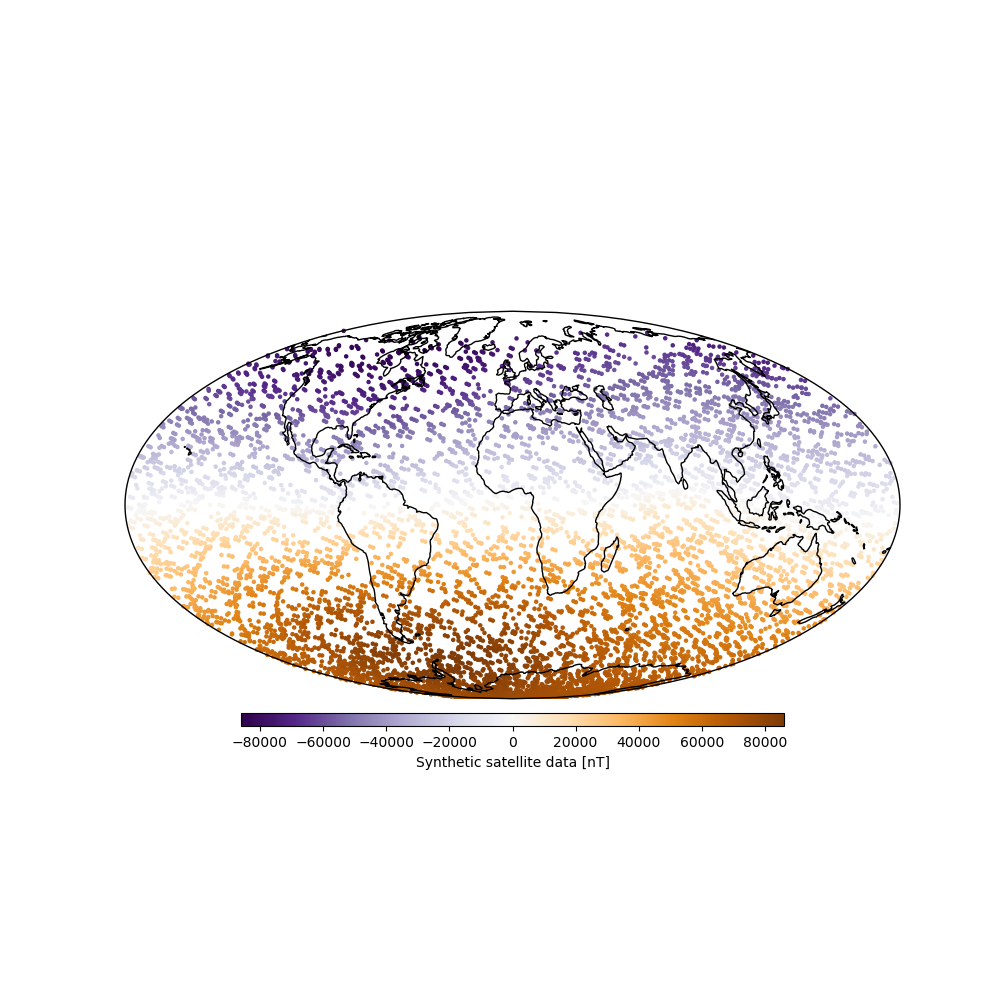

In [39]:
mt_util.plot_cartopy_global(lat = s_sat.lat, lon = s_sat.lon, plot_quality = "high", point_size=5, 
                            data=s_sat.data, cmap = 'PuOr_r', title="Synthetic satellite data")

In [40]:
print(s_sat)


______current attributes______

a:                6371.2
r_sat:            6721.2
r_cmb:            3480.0
rad:              0.017453292519943295
mu0:              1.2566370614359173e-06
comment:          Attempt at separation
class_abs_path:   /home/mikotz/spherical_direct_sequential_simulation
N_SH:             60
sim_type:         separation
swarm_theta:      (7978,), Max/Min: 177.75 / 15.87
swarm_phi:        (7978,), Max/Min: 180.00 / -180.00
swarm_radius:     (7978,), Max/Min: 6890.54 / 6806.85
swarm_obs:        (7978,), Max/Min: 53129.75 / -48881.72
swarm_N:          7978
r_grid:           (7978,), Max/Min: 6890.54 / 6806.85
grid:             (7978, 2)
sph_d:            None
lon:              (7978,), Max/Min: 180.00 / -180.00
lat:              (7978,), Max/Min: 74.13 / -87.75
N_grid:           7978
B_ensemble_swarm: (7978, 3)
data:             (7978,), Max/Min: 85908.32 / -84353.75
target_var:       2491895362.119507
target_mean_true: 22670.59610247127
target_mean:      0.0
g_p

# Integrating kernels

In [41]:
G_r_c = mt_util.Gr_vec(core.r_grid, s_sat.r_grid, core.lat, s_sat.lat, core.lon, s_sat.lon)
G_d_c = np.pi/(core.grid_glq_nmax+0.5)*np.multiply(core.grid_glq_w,G_r_c) # +0.5 for parity with SHTOOLS

In [102]:
G_r_l = mt_util.Gr_vec(lithos.r_grid, s_sat.r_grid, lithos.lat, s_sat.lat, lithos.lon, s_sat.lon)
G_d_l = np.pi/(lithos.grid_glq_nmax+0.5)*np.multiply(lithos.grid_glq_w,G_r_l) # +0.5 for parity with SHTOOLS

<IPython.core.display.Javascript object>


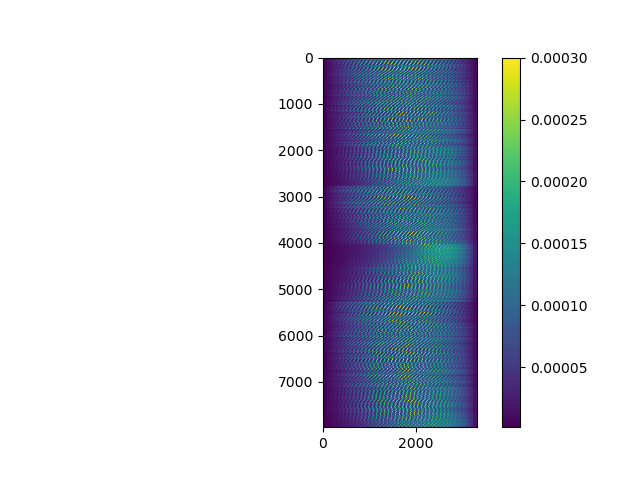

<IPython.core.display.Javascript object>


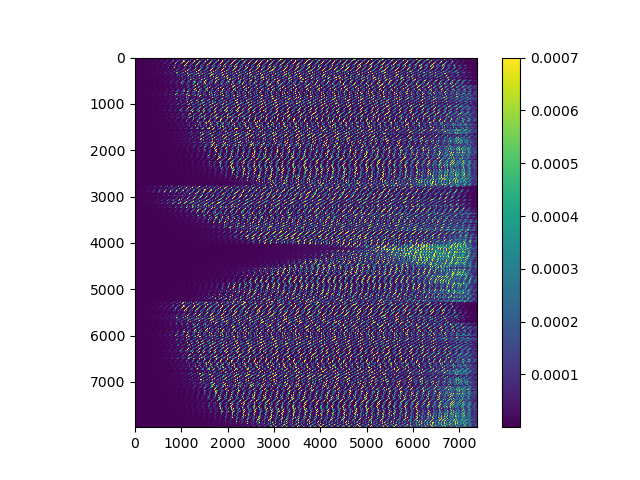

In [103]:
plt.figure()
plt.imshow(G_d_c, vmax = 0.0003)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(G_d_l, vmax = 0.0007)
plt.colorbar()
plt.show()


Gauss-Legendre RMSE:	 0.037356719404


<IPython.core.display.Javascript object>


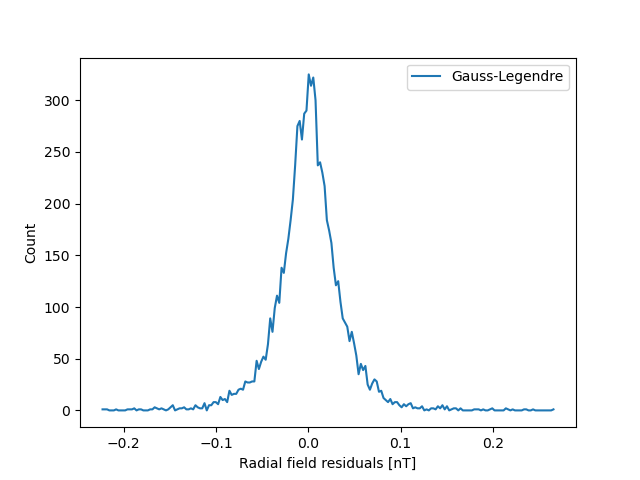

In [104]:
# Compute forward and get residuals to synthetic observations
fwd_leg = G_d_c*core.data.reshape(-1,1) + G_d_l*lithos.data.reshape(-1,1) 
fwd_leg_res = s_sat.data - fwd_leg.reshape(-1,)

# RMSE
rmse_leg = np.sqrt(np.mean(np.power(fwd_leg_res,2)))

print("")
print("Gauss-Legendre RMSE:\t %0.12f" %rmse_leg)
plt.figure()
y,binEdges=np.histogram(fwd_leg_res,bins=200)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'C0',label="Gauss-Legendre")
plt.xlabel("Radial field residuals [nT]")
plt.ylabel("Count")
plt.legend()
plt.show()

In [105]:
G_d_sep = np.hstack((G_d_c, G_d_l))

In [106]:
G_d_sep.shape

(7978, 10702)


Gauss-Legendre RMSE:	 3.856


<IPython.core.display.Javascript object>


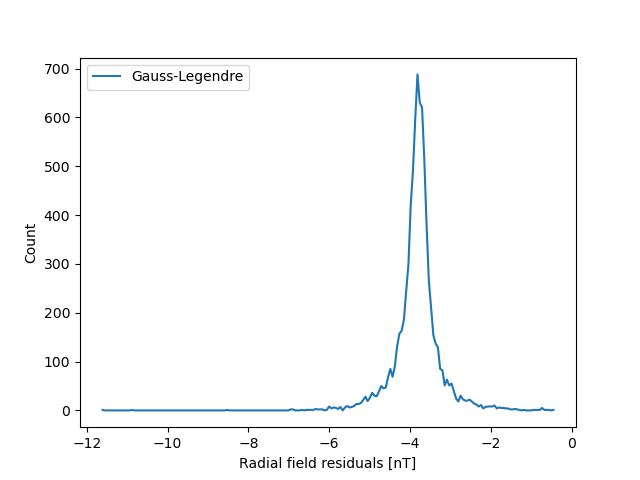

In [107]:
errorstd = 3.0
errorvar = errorstd**2

def covmod_lsq_equiv_sep(obs, semivar_c, semivar_l, target_var_c, target_var_l, G_d_sep, 
                     title="", errorvar = 3**2):
    
    d_0 = obs

    G = G_d_sep.copy()
    
    C_M_c = target_var_c - semivar_c
    C_M_l = target_var_l - semivar_l

    C_M = np.zeros((G.shape[1],G.shape[1]))

    C_M[:C_M_c.shape[0],:C_M_c.shape[0]] = C_M_c
    C_M[-C_M_l.shape[0]:,-C_M_l.shape[0]:] = C_M_l
    
    C_D = np.zeros((len(d_0),len(d_0)))
    C_D[np.arange(1,len(d_0)),np.arange(1,len(d_0))] = errorvar
    S = C_D + G*C_M*G.T
    T = np.linalg.inv(S)
    m_equiv_lsq = C_M*G.T*T*d_0
    
    
    lsq_equiv_pred = G_d_sep*m_equiv_lsq
    lsq_equiv_res = obs - lsq_equiv_pred
    return m_equiv_lsq, lsq_equiv_pred, lsq_equiv_res

m_equiv_lsq, lsq_equiv_pred, lsq_equiv_res = covmod_lsq_equiv_sep(s_sat.data.reshape(-1,1), core.sv_lut, lithos.sv_lut, core.target_var, lithos.target_var, G_d_sep,title="Gauss-Legendre equivalent LSQ solution",errorvar = errorvar)

# RMSE
rmse_leg = np.sqrt(np.mean(np.power(lsq_equiv_res,2)))
print("")
print("Gauss-Legendre RMSE:\t %0.3f" %rmse_leg)
plt.figure()
y,binEdges=np.histogram(lsq_equiv_res,bins=200)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'C0',label="Gauss-Legendre")
plt.xlabel("Radial field residuals [nT]")
plt.ylabel("Count")
plt.legend()
plt.show()

#sds_util.plot_cartopy_global_new(core.lat, core.lon, data=np.ravel(m_equiv_lsq), plot_quality = "high", cmap = 'PuOr_r', title="Gauss-Legendre equivalent LSQ solution", scale_uneven = False)

In [108]:
m_equiv_lsq_c = m_equiv_lsq[:core.grid_glq_N,:]
m_equiv_lsq_l = m_equiv_lsq[-lithos.grid_glq_N:,:]

<IPython.core.display.Javascript object>


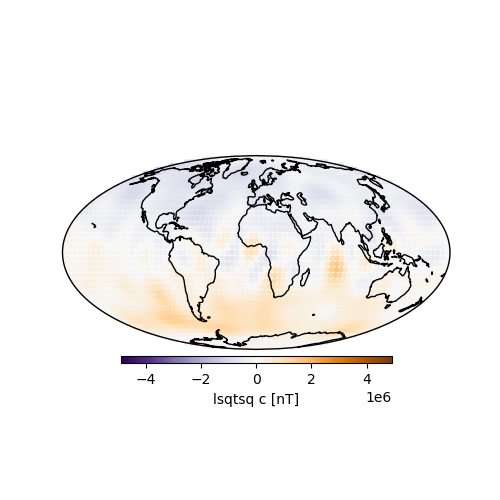

<IPython.core.display.Javascript object>


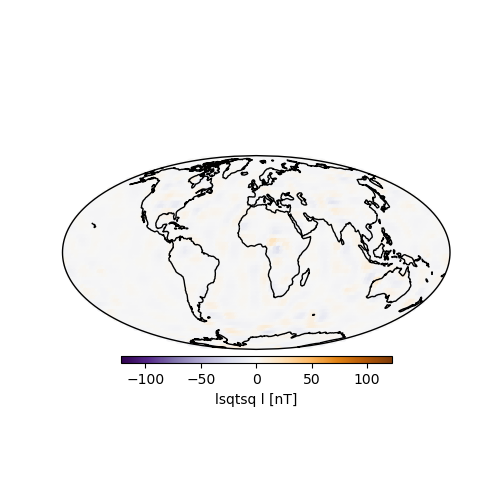

In [109]:
mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=np.ravel(m_equiv_lsq_c), point_size=10,
                            figsize = (5,5), cmap = 'PuOr_r', 
                            title="lsqtsq c", limits_data = core.data)

mt_util.plot_cartopy_global(lat = lithos.lat, lon = lithos.lon, plot_quality = "high", 
                            data=np.ravel(m_equiv_lsq_l), point_size=10,
                            figsize = (5,5), cmap = 'PuOr_r', 
                            title="lsqtsq l", limits_data = lithos.data)

<IPython.core.display.Javascript object>


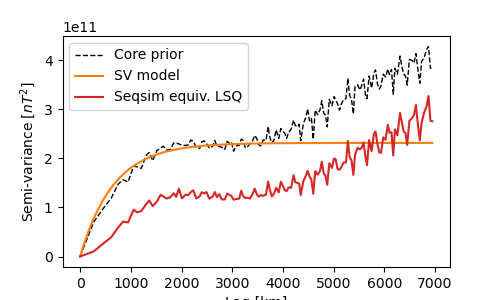

<IPython.core.display.Javascript object>


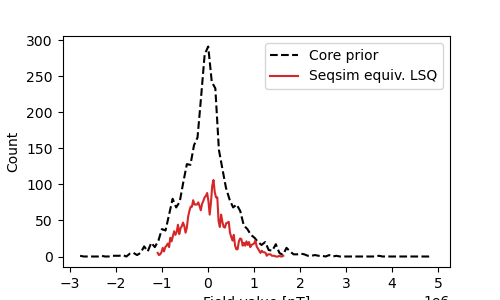

<IPython.core.display.Javascript object>


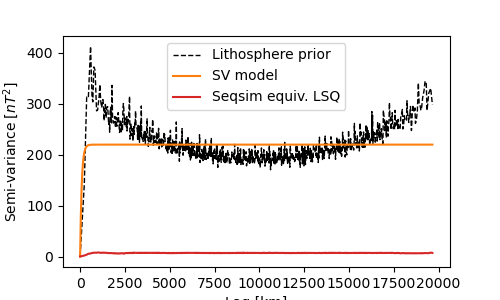

<IPython.core.display.Javascript object>


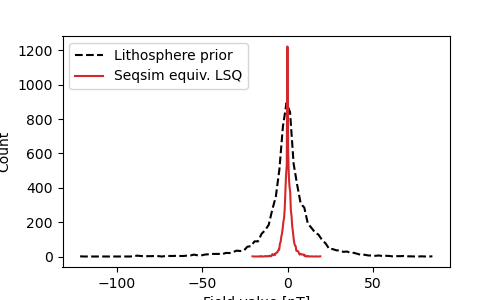

In [110]:
#% SEMI-VARIOGRAM
plt.figure(figsize=(5,3))

core.sv_zs(core.grid_glq_N,1,core.data.reshape(-1,1),core.sort_d,core.n_lags,core.max_cloud)
plt.plot(core.lags,core.pics_zs[:,0],'k--',label='Core prior',linewidth = 1.0)  

plt.plot(core.lags_sv_curve,core.sv_curve,color='C1',label='SV model')

core.sv_zs(core.grid_glq_N,1,np.array(m_equiv_lsq_c),core.sort_d,core.n_lags,core.max_cloud)
plt.plot(core.lags,core.pics_zs[:,0],color = 'C3',label='Seqsim equiv. LSQ')    


plt.ylabel('Semi-variance $[%s^2]$' % "nT")
plt.xlabel('Lag [km]')
plt.legend(loc='best')
plt.show()

#% HISTOGRAM
bins = 100
plt.figure(figsize=(5,3))    

y,binEdges=np.histogram(core.data,bins=bins,density=False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'k--',label='Core prior')

y,binEdges=np.histogram(np.array(m_equiv_lsq_c),bins=bins,density=False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-',color = 'C3',label='Seqsim equiv. LSQ')     

plt.legend(loc='best')
plt.xlabel('Field value %s' % "[nT]")
plt.ylabel('Count')
plt.show()

#% SEMI-VARIOGRAM
plt.figure(figsize=(5,3))

lithos.sv_zs(lithos.grid_glq_N,1,lithos.data.reshape(-1,1),lithos.sort_d,lithos.n_lags,lithos.max_cloud)
plt.plot(lithos.lags,lithos.pics_zs[:,0],'k--',label='Lithosphere prior',linewidth = 1.0)  

plt.plot(lithos.lags_sv_curve,lithos.sv_curve,color='C1',label='SV model')

lithos.sv_zs(lithos.grid_glq_N,1,np.array(m_equiv_lsq_l),lithos.sort_d,lithos.n_lags,lithos.max_cloud)
plt.plot(lithos.lags,lithos.pics_zs[:,0],color = 'C3',label='Seqsim equiv. LSQ')    


plt.ylabel('Semi-variance $[%s^2]$' % "nT")
plt.xlabel('Lag [km]')
plt.legend(loc='best')
plt.show()

#% HISTOGRAM
bins = 100
plt.figure(figsize=(5,3))    

y,binEdges=np.histogram(lithos.data,bins=bins,density=False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'k--',label='Lithosphere prior')

y,binEdges=np.histogram(np.array(m_equiv_lsq_l),bins=bins,density=False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-',color = 'C3',label='Seqsim equiv. LSQ')     

plt.legend(loc='best')
plt.xlabel('Field value %s' % "[nT]")
plt.ylabel('Count')
plt.show()

In [111]:
#%% GREENS CORE
print(G_d_c.shape)
G_k_c = G_d_c*(core.target_var-core.sv_lut)
print(G_k_c.shape)

print(G_d_l.shape)
G_k_l = G_d_l*(lithos.target_var-lithos.sv_lut)
print(G_k_l.shape)

print(G_d_sep.shape)

G_k_sep = np.hstack((G_k_c, G_k_l))

print(G_k_sep.shape)

GG_K_sep = G_k_sep*G_d_sep.T  + np.diag(errorvar*np.ones(s_sat.swarm_N,))
print(GG_K_sep.shape)

#sort_support = np.flipud(np.argsort(G_k_sep,axis=0))
#idx_data_support = sort_support

(7978, 3321)
(7978, 3321)
(7978, 7381)
(7978, 7381)
(7978, 10702)
(7978, 10702)
(7978, 7978)


In [112]:
cov_c = core.target_var - core.sv_lut
cov_l = lithos.target_var - lithos.sv_lut

In [113]:
C_M = np.zeros((G_d_sep.shape[1],G_d_sep.shape[1]))

C_M[:cov_c.shape[0],:cov_c.shape[0]] = cov_c
C_M[-cov_l.shape[0]:,-cov_l.shape[0]:] = cov_l

<IPython.core.display.Javascript object>


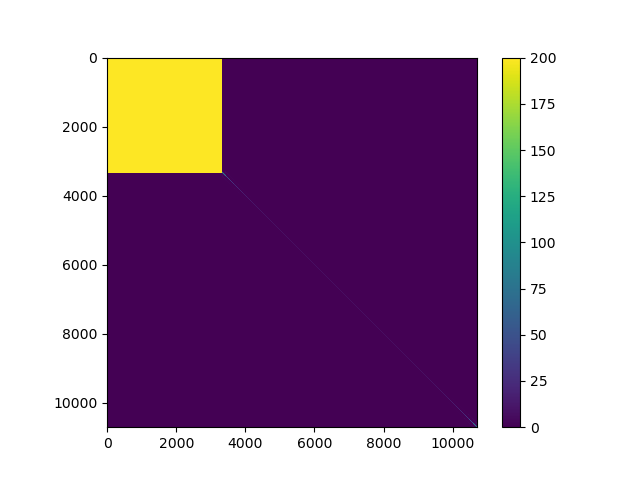

In [114]:
plt.figure()
plt.imshow(C_M, vmax = 200)
plt.colorbar()
plt.show()

In [115]:
def conditional_lookup(cond_mean, cond_var, cond_dist, cond_dist_size, Zk, kriging_var, dm, dv):

    #dist = np.power((condtab["CQF mean"]-Zk)/dm,2)+np.power((condtab["CQF var"]-kriging_var)/dv,2)        
    dist = np.power((cond_mean-Zk)/dm,2)+abs(cond_var-kriging_var)/np.sqrt(dv)


    inv = np.unravel_index(np.argmin(dist),cond_mean.shape)
    idx_n = inv[0]
    idx_v = inv[-1]

    Zf = cond_dist[idx_n,idx_v,np.random.randint(0,cond_dist_size,size=1)]

    Zf_mean = cond_mean[idx_n,idx_v]        
    Zf_std = np.sqrt(cond_var[idx_n,idx_v],dtype=np.float64)

    Zm = (Zf - Zf_mean)*np.sqrt(kriging_var)/Zf_std+Zk

    return Zm

##dist = np.power((condtab["CQF mean"]-Zk)/dm,2)+np.power((condtab["CQF var"]-kriging_var)/dv,2)        
#dist = np.power((core.CQF_mean-Zk)/dm,2)+abs(core.CQF_var-kriging_var)/np.sqrt(dv)

#inv = np.unravel_index(np.argmin(dist),shape)
#idx_n = inv[0]
#idx_v = inv[-1]
#save_mindist.append(dist[inv[0],inv[-1]])

#Zf = core.CQF_dist[idx_n,idx_v,np.random.randint(0,CQF_dist_len,size=1)]

#Zf_mean = core.CQF_mean[idx_n,idx_v]        
#Zf_std = np.sqrt(core.CQF_var[idx_n,idx_v],dtype=np.float64)

#Zm = (Zf - Zf_mean)*np.sqrt(kriging_var)/Zf_std+Zk


#conditional_lookup(core.CQF_mean, core.CQF_var, core.CQF_dist, core.condtab_normsize, Zk, kriging_var, dm_c, dv_c)
#conditional_lookup(lithos.CQF_mean, lithos.CQF_var, lithos.CQF_dist, lithos.condtab_normsize, Zk, kriging_var, dm_l, dv_l)

In [116]:
plt.close("all")

In [ ]:
import time
import random

N_sim = 1
kriging_method = "simple"
"""
Possible kriging_method(s):
    - simple
"""

"""efficiency ravels"""
#shape = core.CQF_mean.shape

"""Number of simulations"""
zs = np.zeros((core.grid_glq_N + lithos.grid_glq_N, N_sim))
time_average = np.zeros((N_sim))

"""save variables"""
idx_nv = list()
lagrange = list()
kriging_mv = list()
rand_paths = list()
invshapes = list()
kriging_weights = list()
kriging_weights_rel_dat = list()
Zis = list()
lstsq_param = list()

prior_data = np.hstack((core.data,lithos.data))

""" Run sequential simulations"""    
for run in range(0,N_sim):
    
    #M = np.empty([core.grid_glq_N + lithos.grid_glq_N,], dtype=float)
    # Start timing
    t0 = time.time()
    random.seed(a=None)
    np.random.seed()

    # Initialize sequential simulation with random start
    idx_rnd = np.arange(core.grid_glq_N + lithos.grid_glq_N)
    
    # Randomize index array to create random path
    random.shuffle(idx_rnd)
    
    """Run spherical direct sequential simulation"""
    
    idx_v = np.empty([0,],dtype=int)
    idx_n = np.empty([0,],dtype=int)
    
    data_min_c = np.min(core.data)
    data_max_c = np.max(core.data)
    dm_c = data_max_c - data_min_c
    dv_c = core.target_var
    
    data_min_l = np.min(lithos.data)
    data_max_l = np.max(lithos.data)
    dm_l = data_max_l - data_min_l
    dv_l = lithos.target_var

    locations_walked = np.empty([0,],dtype=int)
    
    err_mag_sum_c = 0.0
    err_mag_sum_l = 0.0
    len_walked_c = 0
    len_walked_l = 0
    len_walked = 0
    
    # Start random walk
    for step in idx_rnd:
    
        idx = step
        #step_sup = int(step_sup_array[len_walked])
        
        K_ss = np.empty([0,],dtype=np.longdouble)
        K_dd = np.empty([0,],dtype=np.longdouble)
        K_ds = np.empty([0,],dtype=np.longdouble)
        K_sys = np.empty([0,],dtype=np.longdouble)
        
        k_ss = np.empty([0,1],dtype=np.longdouble)
        k_dd = np.empty([0,1],dtype=np.longdouble)
        k_sys = np.empty([0,],dtype=np.longdouble)
        
        Zk = np.empty([0,],dtype=np.longdouble)
        kriging_var = np.empty([0,],dtype=np.longdouble)
        idx_n = np.empty([0,],dtype=int)
        idx_v = np.empty([0,],dtype=int)
        Zf = np.empty([0,],dtype=np.longdouble)
        Zm = np.empty([0,],dtype=np.longdouble)
        #Zm_true = np.empty([0,],dtype=np.longdouble)
        #Zm_lstsq = np.empty([0,],dtype=np.longdouble)
        
        err_mag_avg = np.empty([0,],dtype=np.longdouble)
        
        #idx_data_support_SN = np.empty([0,],dtype=int)
        
        #vario_near = np.empty([0,],dtype=np.longdouble)
        #idx_vario_sort = np.empty([0,],dtype=int)
        #idx_SN = np.empty([0,],dtype=int)
        #vario_SN = np.empty([0,],dtype=np.longdouble)
        kriging_weights = np.empty([0,],dtype=np.longdouble)
        Zi = np.empty([0,],dtype=np.longdouble)
        kwksys = np.empty([0,],dtype=np.longdouble)
        
        #lagrange = 0.0
        #lagrange_vert_sim = np.empty([0,],dtype=np.longdouble)
        #lagrange_horz_sim = np.empty([0,],dtype=np.longdouble)
        
        #lstsq_sol = np.empty([0,],dtype=np.longdouble)
        
        #walked_in_reach += 1
        
        """ SORT METHOD """
        
        cov_walked = C_M[idx,locations_walked]
        
        #vario_near = core.sv_lut[idx,locations_walked]     
        #sort_support = np.argsort(vario_near,axis=0)
        #idx_loc_walk_use = locations_walked[sort_support]

        
        #if len(vario_near) >= 1:
            #len_sup = len(sort_support)
            #idx_SN = np.ravel(idx_loc_walk_use.T)
            #vario_SN = core.sv_lut[idx,idx_SN]
        #else:             
        #    idx_SN = idx_loc_walk_use[:0]
        #    vario_SN = vario_near[sort_support][:0]
        
        """LIMITED DATA USE"""
        
        # Find nearest data
        #idx_data_support_SN = idx_data_support[:,idx].T
        
        # G_d lookup for k_dd and K_ds
        #look_G_d = G_d[np.ravel(idx_data_support_SN),:]
        #look_G_d_sep = G_d_sep
        
        #print(np.shape(look_G_d))

        # Set up k
        #k_ss = core.target_var - np.matrix(vario_SN).T
        k_ss = cov_walked.reshape(-1,1)
        
        #print("breaking")
        #break
        #print("didnt break")
        
        #k_dd = np.matmul(look_G_d,(core.target_var-(core.sv_lut[idx,:]).T)).reshape(-1,1)
        k_dd = np.matmul(G_d_sep,C_M[idx,:]).reshape(-1,1)
        
        # Lookup all closest location semi-variances to each other (efficiently)
        #K_ss = core.target_var - (np.ravel(core.sv_lut)[(idx_SN + (idx_SN * core.sv_lut.shape[1]).reshape((-1,1))).ravel()]).reshape(idx_SN.size, idx_SN.size)
        K_ss = (np.ravel(C_M)[(locations_walked + (locations_walked * C_M.shape[1]).reshape((-1,1))).ravel()]).reshape(locations_walked.size, locations_walked.size)
        
        # Efficient lookup of Greens
        #K_dd = (np.ravel(GG_K)[(idx_data_support_SN + (idx_data_support_SN * GG_K.shape[1]).reshape((-1,1))).ravel()]).reshape(idx_data_support_SN.size, idx_data_support_SN.size)
        K_dd = GG_K_sep
        
        #if len(idx_SN) >= 1:
        if len(locations_walked) >= 1:
            #K_ds = np.matmul(look_G_d,core.target_var-core.sv_lut[idx_SN,:].T).T
            K_ds = np.matmul(G_d_sep,C_M[:,locations_walked]).T
        
        #print(k_ss.shape)
        #print(k_dd.shape)
        k_sys = np.vstack((k_ss,k_dd))
        
        K_sys = np.zeros((len(K_dd)+len(K_ss),len(K_dd)+len(K_ss)))
        K_sys[-len(K_dd):,-len(K_dd):] = K_dd
        
        #if len(idx_SN) >= 1:
        if len(locations_walked) >= 1:    
            K_sys[:len(K_ss),:len(K_ss)] = K_ss
            K_sys[:len(K_ss),-len(K_dd):] = K_ds
            K_sys[-len(K_dd):,:len(K_ss)] = K_ds.T

        #Zi = np.matrix(np.matrix(M[idx_SN]).T)
        #Zi = M[locations_walked].reshape(-1,1)
        Zi = zs[locations_walked,run].reshape(-1,1)
        
        if len_walked > 0:
            #print(Zi.shape)
            #print(s_sat.data.reshape(-1,1).shape)
            Zi = np.vstack((Zi,s_sat.data.reshape(-1,1))).T
        else:
            Zi = s_sat.data.reshape(-1,1).T
        
        
        
        #if np.size(Zk) == 0:                
        if kriging_method == "simple":
            """SIMPLE KRIGING (SK)"""
            #if np.size(kriging_weights) == 0:
            #kriging_weights = np.linalg.solve(K_sys,k_sys)

            c_lower = sp.linalg.cho_factor(K_sys)
            kriging_weights = sp.linalg.cho_solve(c_lower,k_sys)
            
            kriging_var = C_M[idx,idx] - np.float(kriging_weights.T*k_sys)
            
            if kriging_var < 0.0:
                print("")
                print("Negative kriging variance: %s" %kriging_var)
                print("")
                kriging_weights[kriging_weights<0] = 0
                kriging_var = C_M[idx,idx] - np.float(kriging_weights.T*k_sys)
            
            Zk = np.float(np.array(kriging_weights.T@(Zi.T - 0.0) + 0.0))
        
        
        if idx < core.grid_glq_N:
            Zm = conditional_lookup(core.CQF_mean, core.CQF_var, core.CQF_dist, core.condtab_normsize, Zk, kriging_var, dm_c, dv_c)
        else:
            Zm = conditional_lookup(lithos.CQF_mean, lithos.CQF_var, lithos.CQF_dist, lithos.condtab_normsize, Zk, kriging_var, dm_l, dv_l)
        
        #M[idx] = Zm
        zs[idx,run] = Zm
        
        # Count locations walked for search neighborhood
        locations_walked = np.append(locations_walked, idx)
        len_walked += 1
        
        # Get running sense of size of error compared to prior
        err_mag = np.log10(float(np.abs((prior_data)[idx]-Zm)))

        if idx < core.grid_glq_N:
            len_walked_c += 1
            err_mag_sum_c += err_mag
            err_mag_avg = float(err_mag_sum_c/len_walked_c)
        else:
            len_walked_l += 1
            err_mag_sum_l += err_mag
            err_mag_avg = float(err_mag_sum_l/len_walked_l)
        
        mt_util.printProgressBar (len(locations_walked), core.grid_glq_N + lithos.grid_glq_N, err_mag_avg, subject = ' realization nr. %d' % run)
    # End timing
    
    t1 = time.time()
    
    # Keep all realizations
    #zs[:,run] = M
    
    # Plot statistics of run
    time_average[run] = (t1-t0)
    if time_average[run] < 60:
        print('Run time: %.3f' %(time_average[run]), 'seconds', '')
    elif time_average[run] < 3600:
        print('Run time: %.3f' %(time_average[run]*60**(-1)), 'minutes', '')
    else:
        print('Run time: %.3f' %(time_average[run]*60**(-2)), 'hours', '')
    if np.sum(time_average[:(run+1)])*60**(-1) > 60:
        print('Total elapsed time: %.3f' %(np.sum(time_average[:(run+1)])*60**(-2)), 'hours', '')
    else:
        print('Total elapsed time: %.3f' %(np.sum(time_average[:(run+1)])*60**(-1)), 'minutes', '')
        
    print('C Variance: %.3f' %np.var(zs[:core.grid_glq_N,run]))
    print('C Mean: %.3f' %np.mean(zs[:core.grid_glq_N,run]))
    print('C Max: %.3f' %np.max(zs[:core.grid_glq_N,run]))
    print('C Min: %.3f' %np.min(zs[:core.grid_glq_N,run]))

    print('L Variance: %.3f' %np.var(zs[-lithos.grid_glq_N:,run]))
    print('L Mean: %.3f' %np.mean(zs[-lithos.grid_glq_N:,run]))
    print('L Max: %.3f' %np.max(zs[-lithos.grid_glq_N:,run]))
    print('L Min: %.3f' %np.min(zs[-lithos.grid_glq_N:,run]))
    
    print('Run nr.:', run+1)
    print('')
    
    # Save realizations after each step
    np.save("zs_{}".format(nb_name), zs)
    
    

In [94]:
kriging_weights[kriging_weights<0]

array([-1.16283927, -0.01557808, -0.01774316, ..., -0.00628042,
       -0.00122814, -0.00383356])

<ipython-input-171-30b65db898f1>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


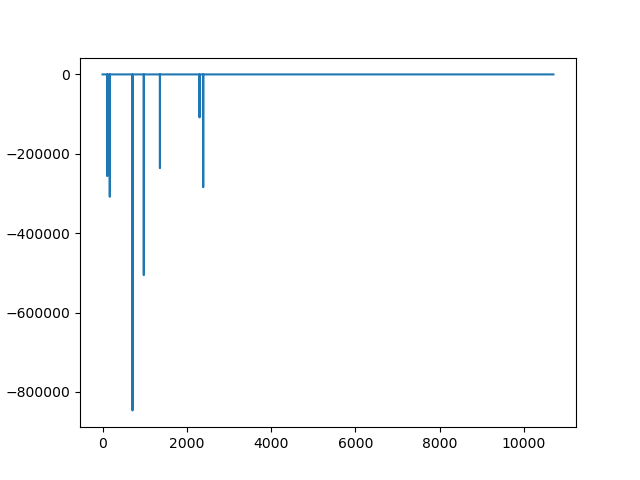

In [171]:
plt.figure()
plt.plot(zs[:,run])
plt.show()

In [172]:
m_c = zs[:core.grid_glq_N,run]
m_l = zs[-lithos.grid_glq_N:,run]

In [173]:
m_c.shape

(3321,)

<ipython-input-176-819c8330df9b>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


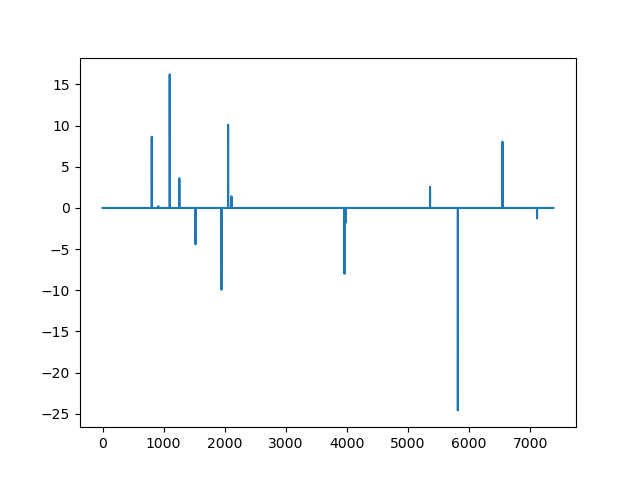

In [176]:
plt.figure()
plt.plot(m_l)
plt.show()

<IPython.core.display.Javascript object>


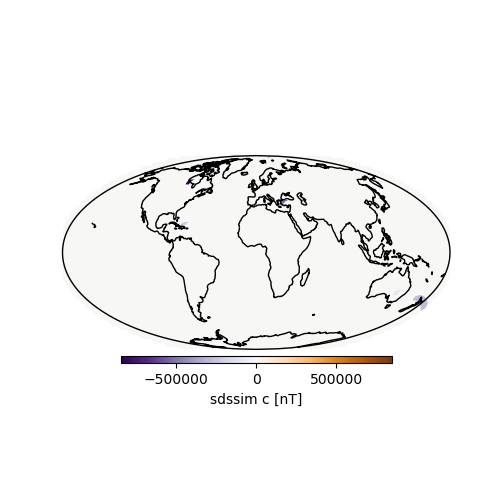

<IPython.core.display.Javascript object>


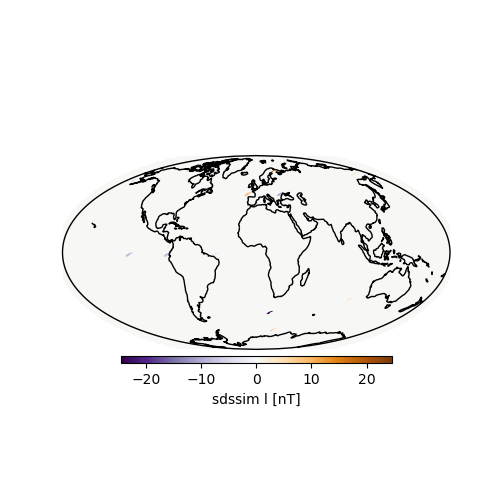

In [178]:
mt_util.plot_cartopy_global(lat = core.lat, lon = core.lon, plot_quality = "high", 
                            data=np.ravel(m_c), point_size=100,
                            figsize = (5,5), cmap = 'PuOr_r', 
                            title="sdssim c")

mt_util.plot_cartopy_global(lat = lithos.lat, lon = lithos.lon, plot_quality = "high", 
                            data=np.ravel(m_l), point_size=100,
                            figsize = (5,5), cmap = 'PuOr_r', 
                            title="sdssim l")

In [113]:
idx

6548

In [114]:
k_sys.shape

(9165, 1)

In [78]:
kriging_weights.shape

(7983, 1)

In [79]:
k_sys[:len(locations_walked)][locations_walked < core.grid_glq_N]

matrix([[0.],
        [0.],
        [0.]])

In [80]:
k_sys[:len(locations_walked)][locations_walked >= core.grid_glq_N]

matrix([[-142.95641316],
        [-142.95641316]])

In [81]:
locations_walked

array([12807,  7754,  5935,  4624,  6405])

In [71]:
locations_walked < core.grid_glq_N

array([ True, False,  True,  True, False])

In [63]:
core.grid_glq_N

7381

In [82]:
zs.shape

(1891, 100)


Seqsim RMSE:	 [[0.93039355 0.92054845 1.02577216 1.06112382 0.97370679 0.93980136
  0.95724905 1.70235551 0.99433293 1.02152283 0.99883327 0.90132485
  0.88942232 0.98587489 0.98537155 1.00568176 0.91473747 1.0340467
  1.06622688 0.90510451 0.97670985 0.9121519  0.982886   1.02948077
  1.0085726  0.9634818  0.86021705 1.02957924 0.98231022 0.99932622
  0.94777965 1.05668685 0.9525954  0.89318115 0.90325822 0.96982575
  0.90136166 1.09810729 0.91096482 0.97890054 0.89605392 0.97577285
  0.98553296 0.90396819 0.94291866 0.99455621 1.06778168 0.97583516
  0.91346322 0.96249619 1.05832979 0.93440889 0.92390792 1.01633148
  0.98055573 0.97245307 0.98338388 0.96057363 0.93681821 0.97077357
  1.02940668 0.90841023 0.96509113 1.05039384 0.93319609 1.023367
  0.8998262  0.96029049 0.90955009 1.0352212  1.03886254 0.95080899
  0.98053137 0.87170397 1.10375674 1.01569198 0.99163602 1.08391905
  0.98447485 0.99257365 0.99669043 1.01102047 0.95879835 0.9306002
  0.98139488 0.95728097 0.93182632 0.

<IPython.core.display.Javascript object>


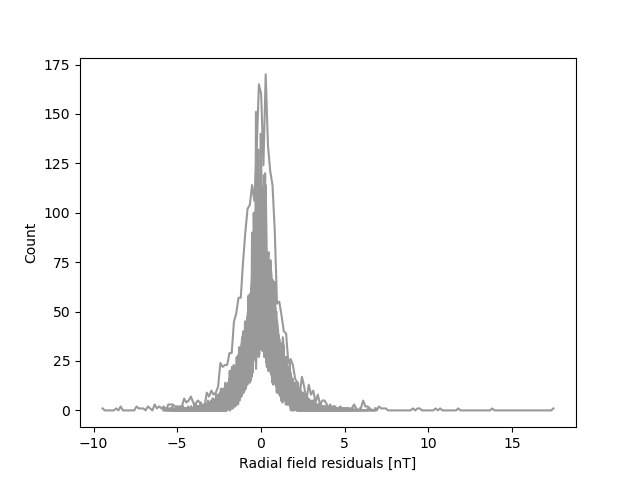

In [83]:
seqsim_pred = G_d*zs
seqsim_res = s_sat.data.reshape(-1,1) - seqsim_pred

rmse_leg = np.sqrt(np.mean(np.power(seqsim_res,2),axis=0))
print("")
print("Seqsim RMSE:\t {}".format(rmse_leg))

color_rgb = (0.6,0.6,0.6)
plt.figure()
for i in np.arange(0,N_sim):
    y,binEdges=np.histogram(seqsim_res[:,[i]],bins=200)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    if i == 0:
        plt.plot(bincenters,y,'-',color = color_rgb,label='Seqsim')  
    else:
        plt.plot(bincenters,y,'-',color = color_rgb)  
        
plt.xlabel("Radial field residuals [nT]")
plt.ylabel("Count")
plt.show()

<IPython.core.display.Javascript object>


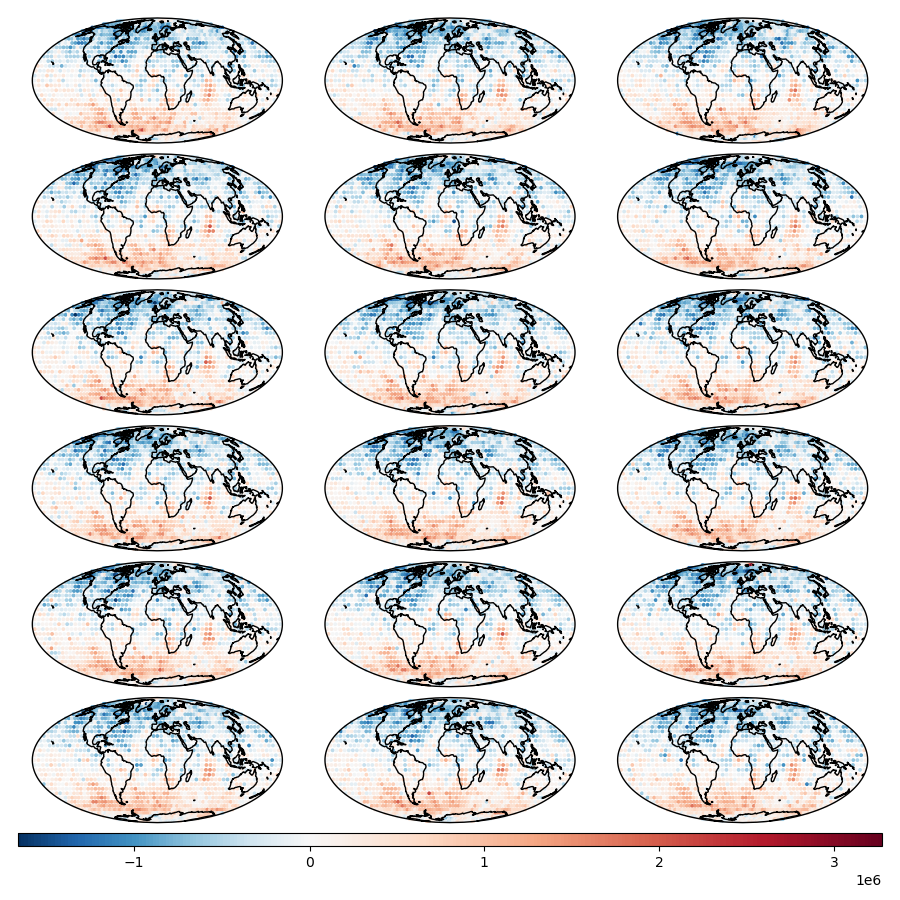

In [95]:
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.lon, core.lat, zs, tile_size_row = 6, tile_size_column = 3, 
                        figsize=(9,9), limit_for_SF = 10**6, shrink_factor = 1.0, point_size = 3,
                        left=0.02, bottom=0.06, right=0.98, top=0.98, wspace = 0.05, hspace=0.1, 
                        savefig = False, save_string = "test", 
                        projection = ccrs.Mollweide())

<IPython.core.display.Javascript object>


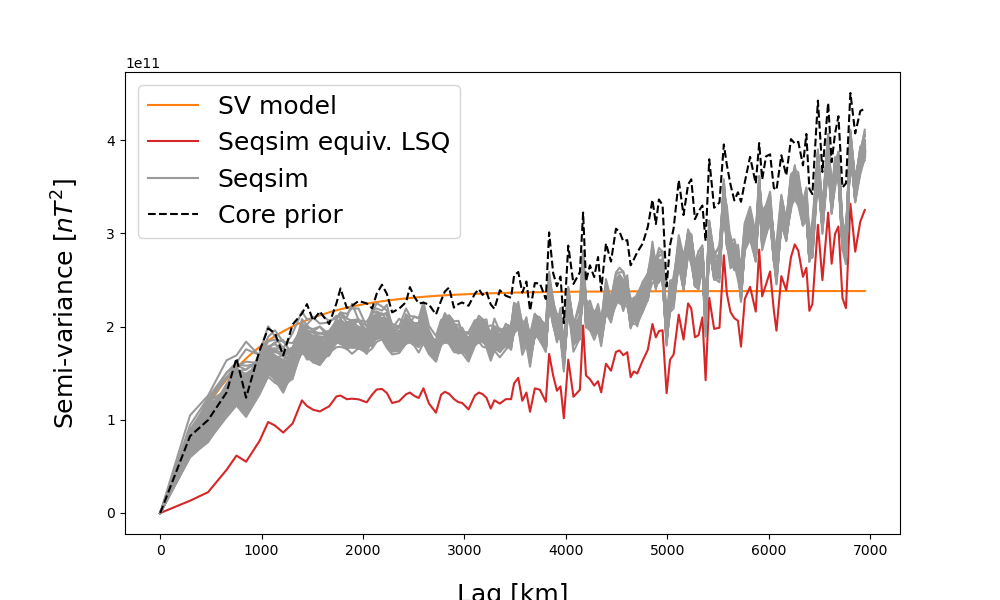

<IPython.core.display.Javascript object>


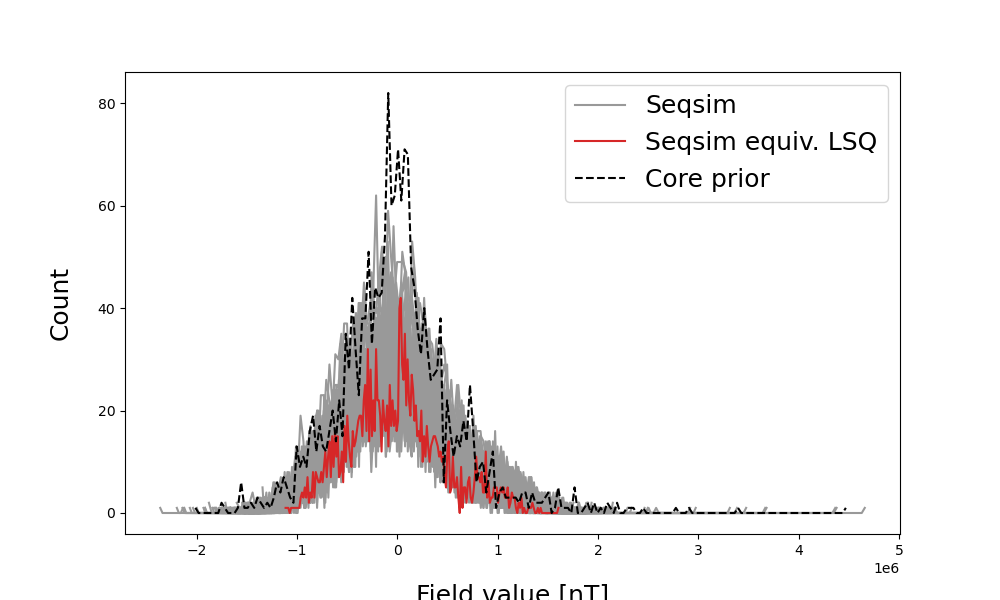

In [105]:
color_rgb = (0.6,0.6,0.6)
bins = 200

#% SEMI-VARIOGRAM
plt.figure(figsize=(10,6))

#plt.plot(core.lags_model,core.pics_model,'.',markersize=10,label='modelling data')

plt.plot(core.lags_sv_curve,core.sv_curve,color='C1',label='SV model')


core.sv_zs(core.grid_glq_N,1,np.array(m_equiv_lsq),core.sort_d,core.n_lags,core.max_cloud)
plt.plot(core.lags,core.pics_zs[:,0],color = 'C3',label='Seqsim equiv. LSQ')    

for i in np.arange(0,N_sim):
    core.sv_zs(core.grid_glq_N,1,zs[:,[i]],core.sort_d,core.n_lags,core.max_cloud)
    if i == 0:
        plt.plot(core.lags,core.pics_zs[:,0],color = color_rgb, label='Seqsim')
    else:
        plt.plot(core.lags,core.pics_zs[:,0],color = color_rgb) 
#print(zs[:,[0]].shape)
#print(core.pics_zs.shape)

#core.sv_zs(core.grid_glq_N,1,data_lstsq["data"].reshape(-1,1),core.sort_d,core.n_lags,core.max_cloud)
#plt.plot(core.lags,core.pics_zs[:,0],color = 'C4',label='LSQ')  

#plt.plot(core.lags,core.pics,'o', markersize=10,color = '0.85',label='Core field estimate')

core.sv_zs(core.grid_glq_N,1,core.data.reshape(-1,1),core.sort_d,core.n_lags,core.max_cloud)
plt.plot(core.lags,core.pics_zs[:,0],'k--',label='Core prior') 

plt.ylabel('Semi-variance $[%s^2]$' % "nT",fontsize=18,labelpad=18)
plt.xlabel('Lag [km]',fontsize=18,labelpad=18)
plt.legend(loc='best',fontsize=18)
plt.show()

#% HISTOGRAM
plt.figure(figsize=(10,6))     

for i in np.arange(0,N_sim):
    y,binEdges=np.histogram(zs[:,[i]],bins=bins,density=False)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    if i == 0:
        plt.plot(bincenters,y,'-',color = color_rgb,label='Seqsim')  
    else:
        plt.plot(bincenters,y,'-',color = color_rgb)   

#y,binEdges=np.histogram(data_lstsq["data"].reshape(-1,1),bins=50,density=False)
#bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
#plt.plot(bincenters,y,'-',color = 'C4',label='LSQ')    

y,binEdges=np.histogram(np.array(m_equiv_lsq),bins=bins,density=False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-',color = 'C3',label='Seqsim equiv. LSQ') 

y,binEdges=np.histogram(core.data,bins=bins,density=False)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'k--',label='Core prior')

plt.legend(loc='best',fontsize=18)
plt.xlabel('Field value %s' % "[nT]",fontsize=18,labelpad=18)
plt.ylabel('Count',fontsize=18,labelpad=18)
plt.show()

In [98]:
g_spec = []

for i in np.arange(0,N_sim):

    C_cilm = pyshtools.expand.SHExpandGLQ(zs[:,[i]].reshape(core.grid_glq_nmax+1,2*core.grid_glq_nmax+1), core.grid_glq_w_shtools, core.grid_glq_zero, [2, 1, core.grid_glq_nmax])
    nm_C = mt_util.array_nm(core.grid_glq_nmax)

    C_corr_sh = 1/(nm_C[:,[0]]+1)*1/(core.a/core.r_cmb)**(nm_C[:,[0]]+2)
    
    C_index = np.transpose(pyshtools.shio.SHCilmToCindex(C_cilm))
    C_index = C_index[1:,:]*C_corr_sh

    C_vec = mt_util.gauss_vector(C_index, core.grid_glq_nmax, i_n = 0, i_m = 1)
    
    g_spec.append(C_vec)

g_spec = np.array(g_spec).T
print(g_spec.shape)

(960, 100)


In [100]:
g_spec[:3,:10]

array([[-51833.20217476, -51831.43654785, -51832.14111429,
        -51832.70221214, -51832.74989052, -51831.9939887 ,
        -51830.86766503, -51832.71470456, -51832.83963542,
        -51831.32309207],
       [  3138.82170791,   3138.80317834,   3138.7636842 ,
          3138.63842112,   3138.7432248 ,   3138.64435808,
          3138.76156392,   3138.94079359,   3138.5916162 ,
          3138.78784501],
       [   680.12039001,    680.24432929,    680.30820831,
           680.32525285,    680.18264079,    680.28778716,
           680.20056055,    680.03108549,    680.16263912,
           680.28426942]])

In [101]:
g_spec_compares[:3]

array([-51832.174  ,   3138.7632 ,    680.29256])

<IPython.core.display.Javascript object>


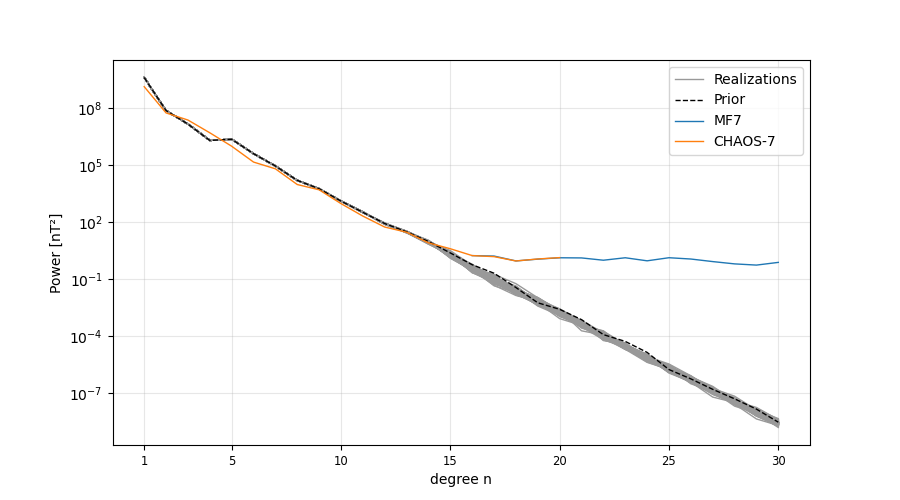

In [102]:
g_spec_compares = core.g_prior
model_dict = {"CHAOS-7", "MF7"}
labels = ["Realization"]

mt_util.plot_p_spec(g_spec, core.r_sat, core.grid_glq_nmax, spec_style = "ensemble",
                    g_spec_compares = g_spec_compares,
                    model_dict = model_dict, label = "Realizations", label_compare = "Prior",
                    lwidth = 1, lwidth_m = 1, figsize = (9,5), color = (0.6, 0.6, 0.6))

In [ ]:
del core.CQF_dist
del core.CQF_mean
del core.CQF_var
del core.sph_d
del core.sv_lut

In [ ]:
# SAVE RESULT
print("\nSaving job")
file_clip = open("core_{}.obj".format(nb_name), "wb")
pickle.dump(core, file_clip, protocol=4)
file_clip.close()

file_clip = open("sat_{}.obj".format(nb_name), "wb")
pickle.dump(s_sat, file_clip, protocol=4)
file_clip.close()
print("\nJob saved and finished")

In [103]:
core.grid_equal_area(N_grid = 15020, r_at = core.r_cmb, poles_remove = True)

core.ensemble_B(g_spec, nmax = core.grid_glq_nmax, r_at = core.r_cmb, grid_type = "eqa")


___ CHANGES TO GRID ___
N = 15020, not compatible for equal area grid
N has been set to 15014


<IPython.core.display.Javascript object>


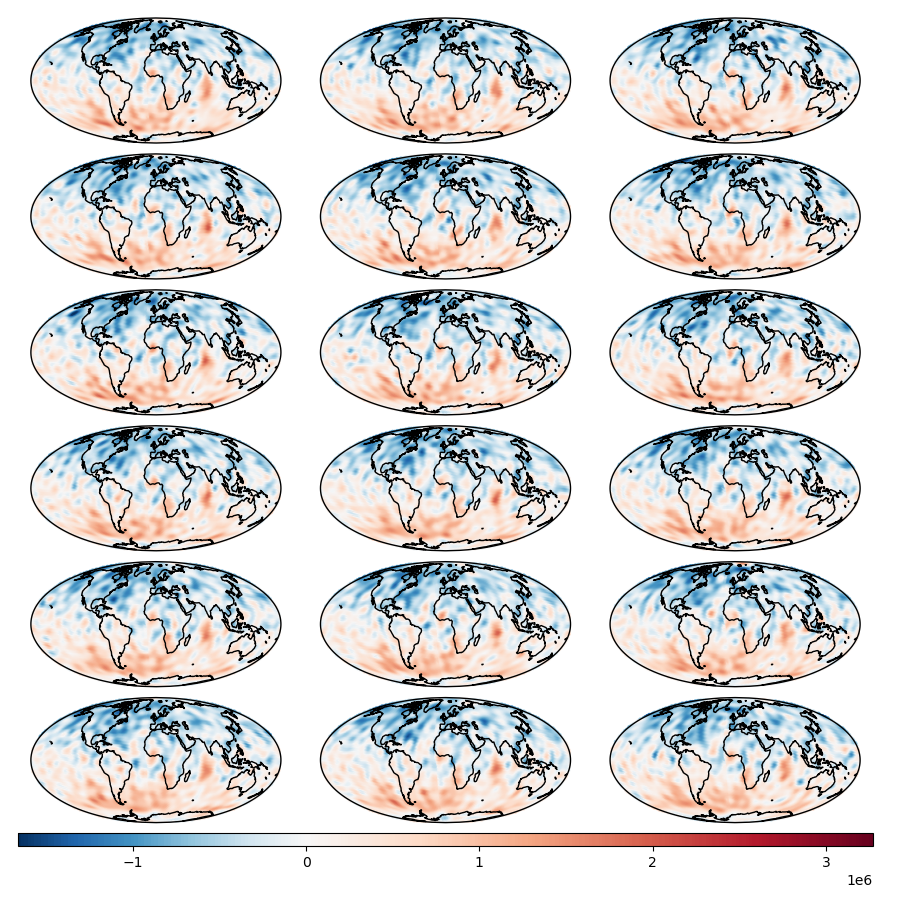

In [104]:
# ccrs.PlateCarree()
# ccrs.Mollweide()
# ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0)

mt_util.plot_ensemble_map_tiles(core.grid_eqa_phi, 90-core.grid_eqa_theta, core.B_ensemble_eqa[:,0,:], 
                        field_compare = zs, tile_size_row = 6, tile_size_column = 3, 
                        figsize=(9,9), limit_for_SF = 10**6, shrink_factor = 1.0, point_size = 3,
                        left=0.02, bottom=0.06, right=0.97, top=0.98, wspace = 0.05, hspace=0.1, 
                        savefig = False, save_string = "test", 
                        projection = ccrs.Mollweide())

In [58]:
# Reload plot module when making small changes
#import importlib
#importlib.reload(mt_util)